In [22]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
from PIL import Image
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
import tensorflow as tf

In [30]:
!pip install kaggle

!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json #Debes subir el archivo llamado "kaggle.json" que descargaste previamente

In [31]:
!kaggle datasets download -d techsash/waste-classification-data

100% 427M/427M [00:10<00:00, 42.8MB/s]
100% 427M/427M [00:11<00:00, 40.7MB/s]


In [32]:
!unzip waste-classification-data.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514

In [34]:
#Codigo para ver las dimenciones de las imagenes dentro de una carpeta

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/DATASET/TRAIN/O'

# Obtén la lista de archivos de imagen en la carpeta
image_files = glob.glob(folder_path + '/*.jpg')

# Itera sobre las imágenes y muestra sus dimensiones
for image_file in image_files:
    # Cargar la imagen
    image = Image.open(image_file)

    # Obtener las dimensiones de la imagen
    width, height = image.size

    # Mostrar las dimensiones de la imagen
    print(f"Imagen: {image_file} - Dimensiones: {width}x{height}")


Se han truncado las últimas 5000 líneas del flujo de salida.
Imagen: /content/DATASET/TRAIN/O/O_10015.jpg - Dimensiones: 299x168
Imagen: /content/DATASET/TRAIN/O/O_6144.jpg - Dimensiones: 300x168
Imagen: /content/DATASET/TRAIN/O/O_2226.jpg - Dimensiones: 275x183
Imagen: /content/DATASET/TRAIN/O/O_3328.jpg - Dimensiones: 301x167
Imagen: /content/DATASET/TRAIN/O/O_3043.jpg - Dimensiones: 275x183
Imagen: /content/DATASET/TRAIN/O/O_132.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_4618.jpg - Dimensiones: 299x169
Imagen: /content/DATASET/TRAIN/O/O_1020.jpg - Dimensiones: 275x183
Imagen: /content/DATASET/TRAIN/O/O_6845.jpg - Dimensiones: 275x183
Imagen: /content/DATASET/TRAIN/O/O_5237.jpg - Dimensiones: 262x192
Imagen: /content/DATASET/TRAIN/O/O_2974.jpg - Dimensiones: 259x194
Imagen: /content/DATASET/TRAIN/O/O_9795.jpg - Dimensiones: 275x183
Imagen: /content/DATASET/TRAIN/O/O_14.jpg - Dimensiones: 249x203
Imagen: /content/DATASET/TRAIN/O/O_3366.jpg - Dimensiones: 225x225
Ima

In [37]:
#Codigo para juntar todas las carpetas de fotos en una sola carpeta

# Rutas de las cuatro carpetas que contienen las imágenes
folder1_path = '/content/DATASET/TEST/O'
folder2_path = '/content/DATASET/TEST/R'
folder3_path = '/content/DATASET/TRAIN/O'
folder4_path = '/content/DATASET/TRAIN/R'

# Ruta de la carpeta donde se guardarán las imágenes juntas
output_folder_path = '/content/Datos juntados'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder_path, exist_ok=True)

# Función para copiar imágenes de una carpeta a la carpeta de salida
def copy_images(folder_path):
    for image_file in os.listdir(folder_path):
        # Ruta completa de la imagen original
        image_path = os.path.join(folder_path, image_file)

        # Ruta completa de la imagen en la carpeta de salida
        output_path = os.path.join(output_folder_path, image_file)

        # Copiar la imagen a la carpeta de salida
        shutil.copy(image_path, output_path)

# Copiar imágenes de la primera carpeta a la carpeta de salida
copy_images(folder1_path)

# Copiar imágenes de la segunda carpeta a la carpeta de salida
copy_images(folder2_path)

# Copiar imágenes de la tercera carpeta a la carpeta de salida
copy_images(folder3_path)

# Copiar imágenes de la cuarta carpeta a la carpeta de salida
copy_images(folder4_path)



In [64]:
# Ruta de la carpeta que contiene las imágenes originales
folder_path = '/content/Datos juntados'

# Ruta de la carpeta donde se guardarán las imágenes redimensionadas
output_folder_path = '/content/Datos recortados'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder_path, exist_ok=True)

# Tamaño deseado para las imágenes (en píxeles)
target_size = (73, 73)  # Reemplaza con el tamaño deseado

# Recorrer las imágenes y subcarpetas en la carpeta
for root, dirs, files in os.walk(folder_path):
    for image_file in files:
        # Ruta completa de la imagen original
        image_path = os.path.join(root, image_file)

        # Abrir la imagen
        image = Image.open(image_path)

        # Convertir la imagen al modo RGB si es necesario
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Redimensionar la imagen
        resized_image = image.resize(target_size)

        # Ruta completa de la imagen redimensionada en la carpeta de salida
        output_path = os.path.join(output_folder_path, image_file)

        # Guardar la imagen redimensionada en la carpeta de salida
        resized_image.save(output_path)



In [39]:
#Codigo para ver las nuevas dimensiones de las imagenes recortadas

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Obtén la lista de archivos de imagen en la carpeta
image_files = glob.glob(folder_path + '/*.jpg')

# Itera sobre las imágenes y muestra sus dimensiones
for image_file in image_files:
    # Cargar la imagen
    image = Image.open(image_file)

    # Obtener las dimensiones de la imagen
    width, height = image.size

    # Mostrar las dimensiones de la imagen
    print(f"Imagen: {image_file} - Dimensiones: {width}x{height}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Imagen: /content/Datos recortados/O_5128.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_7858.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_10513.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_4696.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_4359.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_5413.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_9011.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_10384.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_4652.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_4713.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_220.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_8090.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_12888.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_1586.jpg - Dimensiones: 73x73
Imagen: /cont

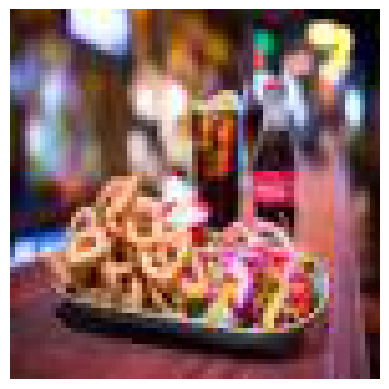

In [42]:
#Codigo para visualizar como se verian las imagenes para corroborar que todo vaya bien

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Lista para almacenar las imágenes
ImagenesdeEntrenamiento = []

# Recorrer los elementos en la carpeta y cargar solo los archivos de imagen
for item in os.listdir(folder_path):
    # Ruta completa del elemento
    item_path = os.path.join(folder_path, item)

    # Verificar si el elemento es un archivo de imagen
    if os.path.isfile(item_path):
        # Cargar la imagen
        image = Image.open(item_path)

        # Añadir la imagen a la lista
        ImagenesdeEntrenamiento.append(image)

# Mostrar la primera imagen en la lista
plt.imshow(ImagenesdeEntrenamiento[1])
plt.axis('off')  # Opcional: desactivar los ejes
plt.show()


In [65]:
#Codigo para guardar las imagenes en una variable y al mismo tiempo crearle sus etiquetas

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Lista para almacenar las imágenes
imagenes = []

# Lista para almacenar las etiquetas
etiquetas = []

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    # Ruta completa de la imagen
    image_path = os.path.join(folder_path, filename)

    # Verificar si es un archivo de imagen
    if os.path.isfile(image_path):
        # Cargar la imagen
        image = Image.open(image_path)

        # Añadir la imagen a la lista de imágenes
        imagenes.append(image)

        # Obtener la etiqueta de la imagen según el nombre del archivo
        if filename.startswith('O'):
            etiqueta = 0
        elif filename.startswith('R'):
            etiqueta = 1
        else:
            etiqueta = -1  # Asignar un valor negativo si no cumple con los casos anteriores

        # Añadir la etiqueta a la lista de etiquetas
        etiquetas.append(etiqueta)


In [44]:
etiquetas

[1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [45]:
imagenes

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67DE17B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67DE1720>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67DE1A80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEDA34B6830>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67DE1AB0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67E41F00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67E401C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AED357CEDD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67ADA8C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67ADA920>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67ADA770>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7AEC67ADA6E0>,
 <PIL.JpegImageP

In [66]:
#Codigo para revisar cuantas imagenes tengo dentro de la carpeta y verificar que sean las mismas dentro de la variable

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Contador de imágenes
cantidad_imagenes = 0

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    # Ruta completa del archivo
    file_path = os.path.join(folder_path, filename)

    # Verificar si es un archivo de imagen
    if os.path.isfile(file_path):
        # Verificar si el archivo es una imagen válida (por extensión)
        extensiones_validas = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
        if any(filename.lower().endswith(extension) for extension in extensiones_validas):
            cantidad_imagenes += 1

print("Cantidad de imágenes:", cantidad_imagenes)


Cantidad de imágenes: 25077


In [67]:
len(imagenes)

25077

In [49]:
len(etiquetas)

25077

In [68]:
#Normalizacion de la variable donde se encuentran las imagenes

# Crear una lista para almacenar las imágenes normalizadas
imagenes_normalizadas = []

# Normalizar los valores de píxeles dividiendo por 255.0
for imagen in imagenes:
    imagen = np.array(imagen) / 255.0
    imagenes_normalizadas.append(imagen)

# Ahora la variable `imagenes_normalizadas` contiene las imágenes normalizadas


In [52]:
del imagenes # Mi RAM estaba colapsando JAJA y elimine la variable que contenia imagenes para ver si esto liberaba RAM

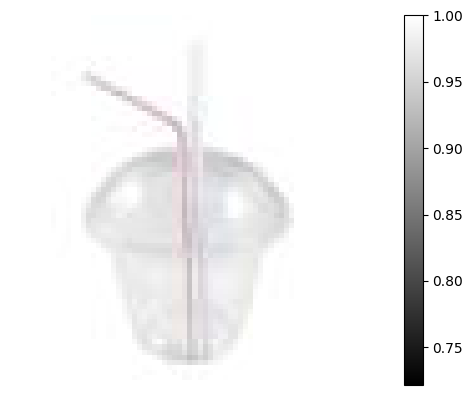

In [69]:
#Codigo para ver la escala de las imagenes ya normalizadas

# Índices de las imágenes que deseas imprimir
indices = [0]

# Iterar sobre los índices y mostrar las imágenes correspondientes
for indice in indices:
    # Obtener la imagen específica que deseas imprimir
    imagen = imagenes_normalizadas[indice]

    # Mostrar la imagen con su escala de píxeles
    plt.imshow(imagen, cmap='gray')
    plt.colorbar()
    plt.axis('off')
    plt.show()


In [54]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes_normalizadas, etiquetas, test_size=0.3, random_state=42)

In [55]:
# Parte convolusional de la RNAC
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(73, 73, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [56]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [57]:
# Compilación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [58]:
# Convertir las listas en matrices NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Imprimir las formas de las matrices
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17553, 73, 73, 3)
y_train shape: (17553,)
X_test shape: (7524, 73, 73, 3)
y_test shape: (7524,)


In [59]:
#Entrenamiento de la RNAC
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 216s 389ms/step - loss: 0.4770 - accuracy: 0.7840 - val_loss: 0.4159 - val_accuracy: 0.8211
Epoch 2/10
549/549 [==============================] - 210s 382ms/step - loss: 0.4117 - accuracy: 0.8216 - val_loss: 0.4021 - val_accuracy: 0.8293
Epoch 3/10
549/549 [==============================] - 229s 417ms/step - loss: 0.3982 - accuracy: 0.8304 - val_loss: 0.3872 - val_accuracy: 0.8386
Epoch 4/10
549/549 [==============================] - 228s 416ms/step - loss: 0.3772 - accuracy: 0.8389 - val_loss: 0.3674 - val_accuracy: 0.8478
Epoch 5/10
549/549 [==============================] - 229s 417ms/step - loss: 0.3585 - accuracy: 0.8471 - val_loss: 0.3494 - val_accuracy: 0.8546
Epoch 6/10
549/549 [==============================] - 208s 379ms/step - loss: 0.3400 - accuracy: 0.8558 - val_loss: 0.3436 - val_accuracy: 0.8538
Epoch 7/10
549/549 [==============================] - 209s 382ms/step - loss: 0.3221 - accuracy: 0.8665 - val_loss: 0.3378 -

236/236 - 21s - loss: 0.3212 - accuracy: 0.8692 - 21s/epoch - 90ms/step


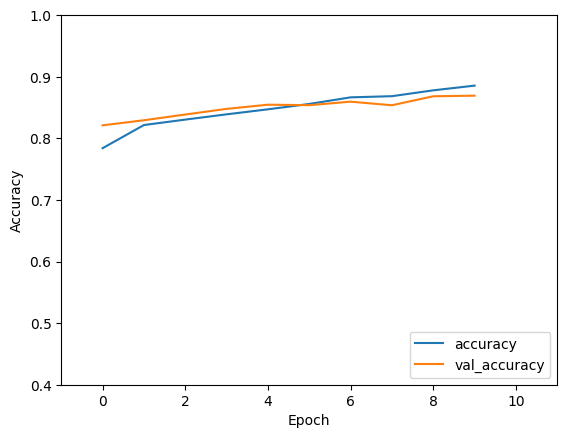

In [60]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)